In [301]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM,Dropout
import matplotlib.pyplot as plt



In [302]:
df = pd.read_csv('STOCK_VAL.csv' , parse_dates=['DATE'] ,dayfirst=True)

for columns in df.columns:
    df[columns] = np.flip(np.array(df[columns]))
df.set_index('DATE' , inplace=True)
df


,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
DATE,,,,,,,
2007-01-02,112.00,112.00,109.50,109.72,1010,59,1.118575e+05
2007-01-03,110.20,111.40,109.20,109.51,1139,70,1.256317e+05
2007-01-04,110.00,111.80,109.00,110.13,2999,99,3.310896e+05
2007-01-05,110.68,112.00,110.00,110.10,1013,72,1.124430e+05
2007-01-08,109.50,113.80,109.06,110.04,1394,60,1.553334e+05
...,...,...,...,...,...,...,...
2023-02-03,4590.00,4656.45,4571.50,4624.80,26221,4118,1.209830e+08
2023-02-06,4602.00,4634.10,4602.00,4626.60,4502,1230,2.079046e+07
2023-02-07,4630.00,4661.50,4595.95,4605.35,5979,1589,2.767515e+07


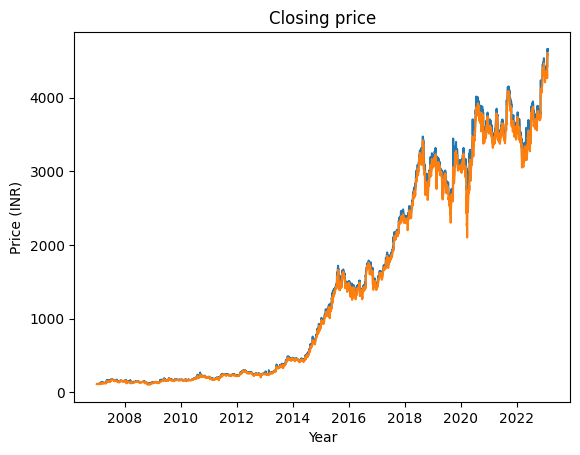

In [303]:
plt.title('Closing price')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.plot(df['HIGH'])
plt.plot(df['LOW'])


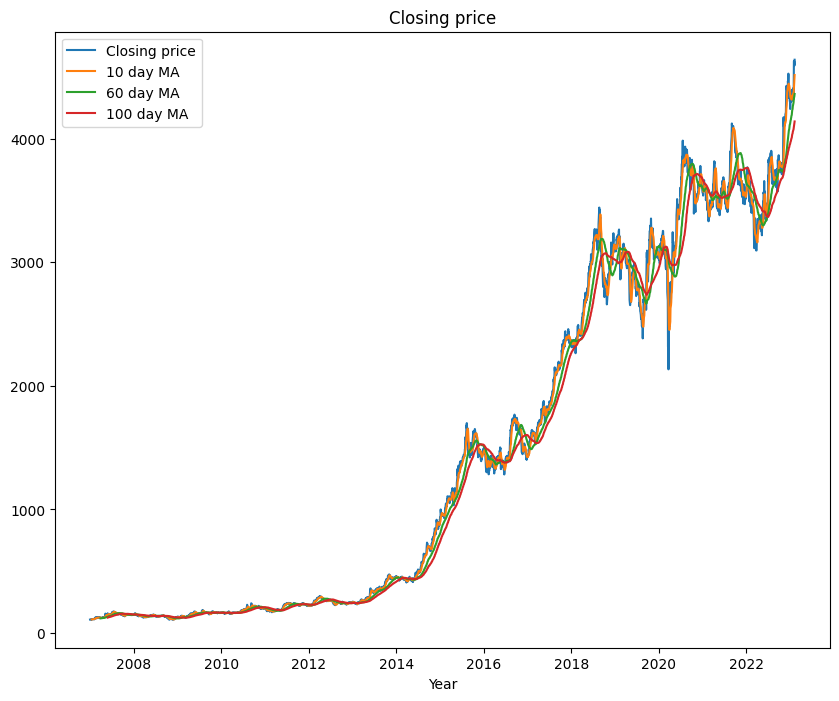

In [304]:
# Moving averages
ma_day = [10,60,100]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['CLOSE'].rolling(ma).mean()

plt.figure(figsize=(10,8))
plt.title('Closing price')
plt.xlabel('Year')

plt.plot(df['CLOSE'] , label = 'Closing price')
plt.plot(df['MA for 10 days'] , label = '10 day MA')
plt.plot(df['MA for 60 days'] , label = '60 day MA')
plt.plot(df['MA for 100 days'] , label = '100 day MA')

plt.legend()



In [305]:
# Create a new dataframe with only the 'CLOSE'
data = df.filter(['CLOSE'])
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3786

In [306]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.04685534e-04],
       [2.58320344e-04],
       [3.95208047e-04],
       ...,
       [9.92879632e-01],
       [9.89700304e-01],
       [1.00000000e+00]])

In [307]:
#Let's declare how much past data we want, in order to predict the next value.
n = 60
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# [0,n] values will be 1st row of training data, [n+1] will be y1
# [1,n+1] values will be 2nd row of trianing data, [n+2] will be y2
# ... and so on

for i in range(n, len(train_data)):
    x_train.append(train_data[i-n:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [308]:
# Build the LSTM model
model = Sequential(
    [
        LSTM(64, return_sequences=True , input_shape= (x_train.shape[1], 1)),
        LSTM(32 , return_sequences=False),
        Dense(25),
        Dense(1),
    ]

)


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10)


2023-05-22 23:04:27.472529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-22 23:04:27.473673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-22 23:04:27.474525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-05-22 23:04:27.848768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-22 23:04:27.850092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-22 23:04:27.851035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

117/117 [==============================] - 5s 24ms/step - loss: 0.0048
Epoch 2/10
117/117 [==============================] - 3s 24ms/step - loss: 2.6972e-04
Epoch 3/10
117/117 [==============================] - 3s 23ms/step - loss: 2.7532e-04
Epoch 4/10
117/117 [==============================] - 3s 23ms/step - loss: 2.3661e-04
Epoch 5/10
117/117 [==============================] - 3s 23ms/step - loss: 2.5111e-04
Epoch 6/10
117/117 [==============================] - 3s 23ms/step - loss: 2.3330e-04
Epoch 7/10
117/117 [==============================] - 3s 23ms/step - loss: 2.3026e-04
Epoch 8/10
117/117 [==============================] - 3s 23ms/step - loss: 1.8589e-04
Epoch 9/10
117/117 [==============================] - 3s 23ms/step - loss: 2.1498e-04
Epoch 10/10
117/117 [==============================] - 3s 23ms/step - loss: 1.6857e-04


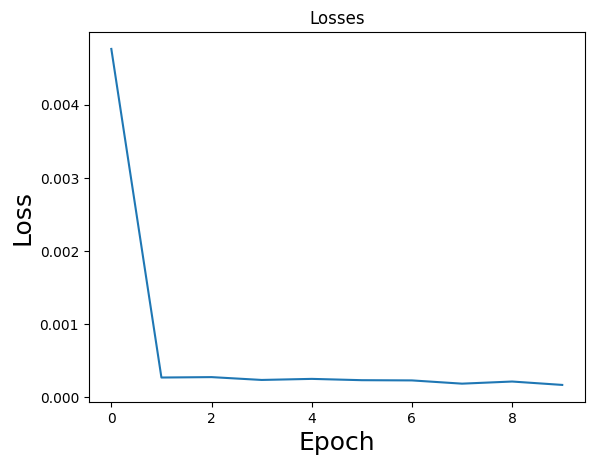

In [309]:
losses = history.history

plt.title('Losses')
plt.ylabel('Loss' , fontsize  = 18)
plt.xlabel('Epoch' , fontsize = 18)
plt.plot(losses['loss'])

In [310]:
# Create the testing data set
# Create a new array containing scaled values from index train_length - 60 to total data length
test_data = scaled_data[training_data_len - n: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = []
for i in range(n, len(test_data)):
    x_test.append(test_data[i-n:i, 0])
    y_test.append(test_data[i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(np.array(y_test).reshape(-1,1))

# Get the root mean squared error (RMSE)
test_rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))


2023-05-22 23:04:57.323210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-22 23:04:57.324410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-22 23:04:57.325236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 0s 7ms/step


In [311]:
# training predictions
predictions_train = model.predict(x_train)

117/117 [==============================] - 1s 7ms/step


/tmp/ipykernel_130572/713074475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Preds'] = scaler.inverse_transform(np.array(predictions_train).reshape(-1,1))


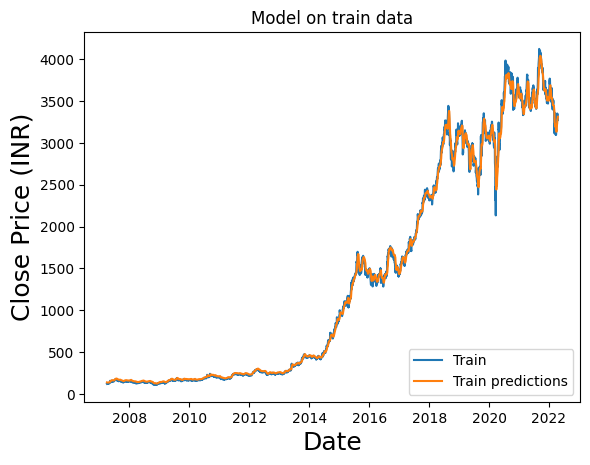

In [312]:
#calculating training error
train = data[n:training_data_len]
train['Preds'] = scaler.inverse_transform(np.array(predictions_train).reshape(-1,1))
train_rmse = np.sqrt(np.mean((np.array(train['Preds'])-np.array(train['CLOSE']))**2))


plt.title('Model on train data')
plt.xlabel('Date', fontsize=18)
plt.plot(train[['CLOSE' , 'Preds']])
plt.ylabel('Close Price (INR)', fontsize=18)
plt.legend([ 'Train', 'Train predictions'], loc='lower right')


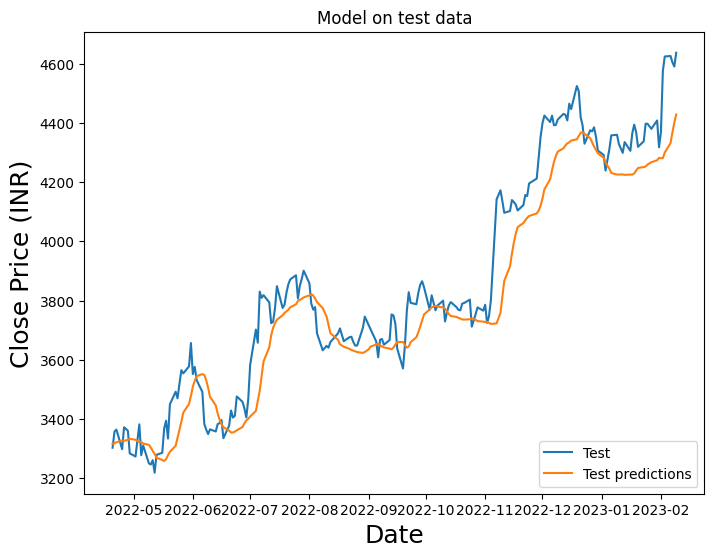

54.327245749839264 121.48201418505919


In [313]:


valid = pd.DataFrame(data[training_data_len:])

valid['Predictions'] = predictions
# Plot the data
plt.figure(figsize=(8,6))
plt.title('Model on test data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (INR)', fontsize=18)

plt.plot(valid[['CLOSE', 'Predictions']])
plt.legend([ 'Test', 'Test predictions'], loc='lower right')
plt.show()
print(train_rmse,test_rmse)


In [314]:
# let's get the last n days of data which is available
last_n_days = scaled_data[-n:]
# will store the next 14 days of closing prices one by one
next_14_days = []

#convert into np array
last_n_days = np.array(last_n_days)

for i in range(14):
    forecast = model.predict(np.reshape(last_n_days , (1,n+i,1))[:,i:,:])

    # update the last n days of data, remove the first value, add the new predicted value, to predict the next day's closing
    last_n_days = np.vstack((last_n_days , forecast[0]))
    next_14_days.append(scaler.inverse_transform(forecast))

next_14_days = np.array(next_14_days).flatten()
    
    


1/1 [==============================] - 0s 16ms/step


In [315]:
#importing true values downloaded from yahoo finance for the rest of the month of february
newdf = pd.read_csv('BRITANNIA.NS.csv' , parse_dates=['Date'] , dayfirst=True)
nxt = pd.DataFrame(columns=['True' , 'Predicted'])
nxt['Date'] = pd.to_datetime(newdf['Date'] , format='%Y-%m-%d')
nxt['Predicted'] = next_14_days
nxt['True'] = newdf['Close']

nxt.set_index(['Date'] , inplace=True)
nxt



,True,Predicted
Date,,
2023-02-09,4637.350098,4455.294922
2023-02-10,4622.700195,4460.631348
2023-02-13,4588.000000,4455.309082
2023-02-14,4599.850098,4443.265137
2023-02-15,4588.450195,4426.974121
2023-02-16,4572.000000,4408.013184
2023-02-17,4533.250000,4387.395020
2023-02-20,4453.799805,4365.778320
2023-02-21,4503.350098,4343.595703


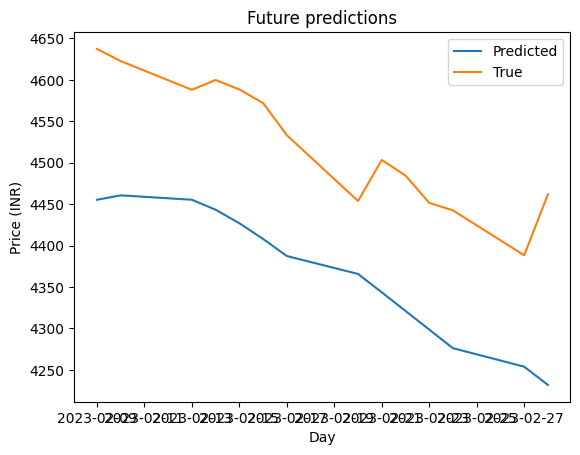

In [316]:
plt.title('Future predictions')
plt.ylabel('Price (INR)')
plt.xlabel('Day')
plt.plot(nxt['Predicted'] , label = 'Predicted')
plt.plot(nxt['True'] , label = 'True')
plt.legend()